**Trabajo 2 - Estadística**

Problema 1

El fichero HAVD Exo02.csv contiene en formato csv datos demográficos de la ciudad de Barcelona obtenidos como datos abiertos proporcionados por la propia ciudad. Se trata del número de habitantes, por edades y por distrito. El último valor representa las personas de más de cien años.

Primero de todo deberemos cargar el fichero para poder empezar a visualizar y entender un poco el data set:

In [3]:
dades <- read.csv(file='HAVD_Exo02.csv', header=TRUE, sep=',', dec='.')
head(dades)

,Dte.,Barris,TOTAL,X0,X1,X2,X3,X4,X5,X6,⋯,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,BARCELONA,,1625137,13633,13918,13712,13533,14018,13968,13801,⋯,4528,3761,2923,2309,1658,1223,827,565,398,767
2,1,1. el Raval,47986,449,431,409,396,457,475,462,⋯,91,67,50,30,30,20,12,9,2,12
3,1,2. el Barri Gòtic,16240,99,97,93,88,99,97,89,⋯,38,36,27,25,11,9,11,3,0,11
4,1,3. la Barceloneta,15101,94,100,86,101,80,71,86,⋯,30,37,29,15,15,12,6,3,5,5
5,1,"4. Sant Pere, Santa Caterina i la Ribera",22923,177,168,166,145,166,164,145,⋯,38,42,31,28,12,9,6,8,5,14
6,2,5. el Fort Pienc,32048,251,266,268,240,281,238,262,⋯,106,73,75,49,44,31,17,16,7,14


Repasando los datos, se detecta un valor demasiado irregular en el total de X80, así que antes de empezar hay que hacer esta modificacion.

In [4]:
sum(dades$X80[-1])

[1] 12920

In [17]:
dades$X80[1] <- 12920
head(dades)

,Dte.,Barris,TOTAL,X0,X1,X2,X3,X4,X5,X6,⋯,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,BARCELONA,,1625137,13633,13918,13712,13533,14018,13968,13801,⋯,4528,3761,2923,2309,1658,1223,827,565,398,767
2,1,1. el Raval,47986,449,431,409,396,457,475,462,⋯,91,67,50,30,30,20,12,9,2,12
3,1,2. el Barri Gòtic,16240,99,97,93,88,99,97,89,⋯,38,36,27,25,11,9,11,3,0,11
4,1,3. la Barceloneta,15101,94,100,86,101,80,71,86,⋯,30,37,29,15,15,12,6,3,5,5
5,1,"4. Sant Pere, Santa Caterina i la Ribera",22923,177,168,166,145,166,164,145,⋯,38,42,31,28,12,9,6,8,5,14
6,2,5. el Fort Pienc,32048,251,266,268,240,281,238,262,⋯,106,73,75,49,44,31,17,16,7,14


1.-Representar un histograma con la distribución de la población de la ciudad por edades.

Para hacerlo, primero deberemos modificar un poco los datos que tenemos.

In [15]:
edades <- dades[1, -c(1,2,3)] #Seleccionamos la columna que nos interesa
edades_t <- t(edades) #Trasponemos los datos
dt.edades_t <- data.frame(edades_t)
dt.edades_t$Edad <- seq(0,100) #Añadimos una columna con la Edad
head(dt.edades_t)

,X1,Edad
,<dbl>,<int>
X0,13633,0
X1,13918,1
X2,13712,2
X3,13533,3
X4,14018,4
X5,13968,5


Ahora, nos dedicaremos a desagrupar los datos para poder montar el histograma. Es necesario desagruparlos para tener observaciones individuales de la edad de cada habitante. Para ello, nos harán falta las librerías 'dplyr' y 'tidyr'.

In [7]:
library('dplyr')
library('tidyr')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [18]:
#Desagrupamos los datos
edades_final <- dt.edades_t %>%
  pivot_longer(cols = -Edad, names_to = "Personas", values_to = "Poblacion") %>%
  ungroup() %>%
  slice(rep(1:n(), times = dt.edades_t$X1))
edades_final$Personas <- 1

head(edades_final)

Edad,Personas,Poblacion
<int>,<dbl>,<dbl>
0,1,13633
0,1,13633
0,1,13633
0,1,13633
0,1,13633
0,1,13633


In [11]:
install.packages('ggplot2') #Instalar la librería
library('ggplot2') #Llamar la librería

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



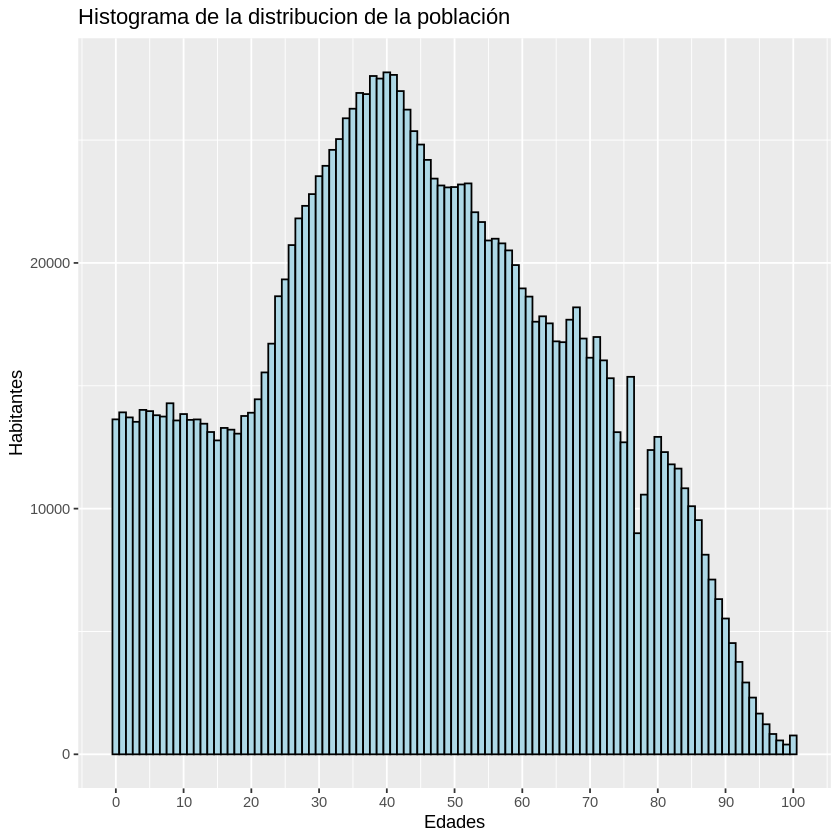

In [12]:
ggplot(edades_final, aes(x = Edad)) +
 geom_histogram(binwidth = 1,
                 fill = 'lightblue',
                 color = 'black') +
 labs(title = 'Histograma de la distribucion de la población',
       x = 'Edades',
       y = 'Habitantes') +
 scale_x_continuous(breaks = seq(0, 100, 10))

Con la información que nos da este gráfico, podemos entender un poco la preocupación de quien dice que tendemos hacia una sociedad envejecida. En el gráfico se observa que la población está concentrada entre los 25 y los 65 años. Y que el número de recién nacidos es igual a las personas alrededor de los 75 años.

También se observa que la moda estará alrededor de los 40 años, ya que es la edad que más cantidad de ciudadanos tienen. Es curioso observar como en general, se puede leer de este gráfico que aumenta mucho la cantidad de población a partir de los 20, puede que esto tenga relación con que es cuando empezamos la carrera laboral y Barcelona es la ciudad con más oportunidades laborales de Catalunya. Para poder afirmar con rotundidad habría que hacer un estudio más completo, porque también se podría relacionar con un decrecimiento brutal de la natalidad.

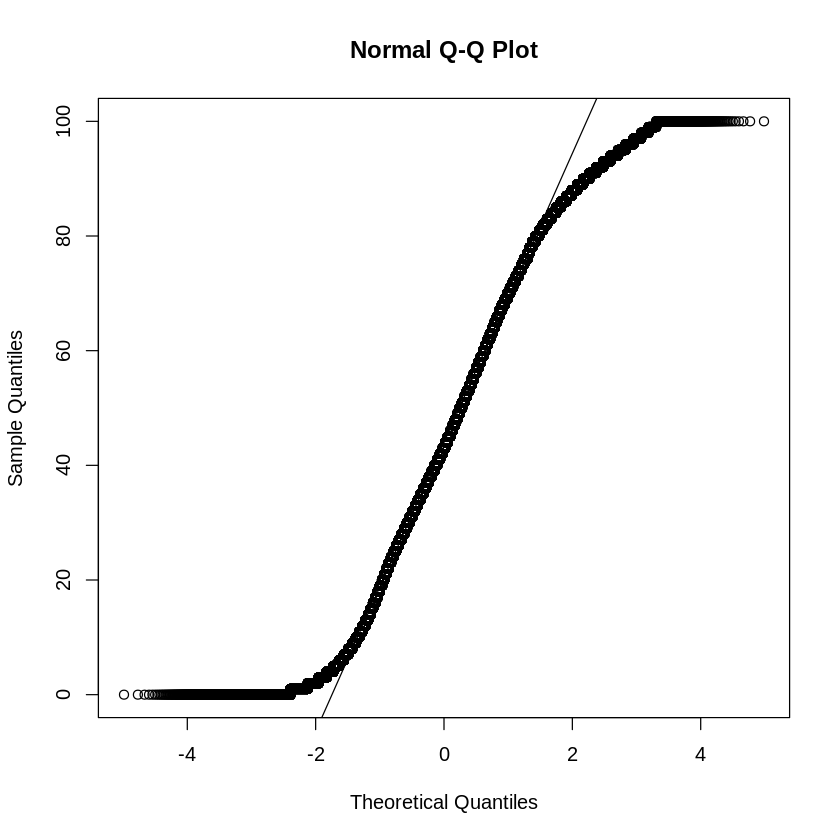

In [14]:
# Relación con la distribución Gaussiana
qqnorm(edades_final$Edad)
qqline(edades_final$Edad)

En este gráfico intentamos comparar nuestra distribución con la distribución normal. Como podemos ver, una parte importante tiene una alta relación con la normal, se puede observar que des que la población empieza a crecer, alrededor de los 20 años, hasta el otro extremo, las cantidades por encima los 80, los puntos están muy cerca de la línea de referencia y cumplen el supuesto de normalidad.

Claramente, podemos observar que son los dos extremos de esta distribución los que hacen que se desvíe un poco de este tipo de distribución.

2.-Representar un boxplot para la distribución de edades de la ciudad.

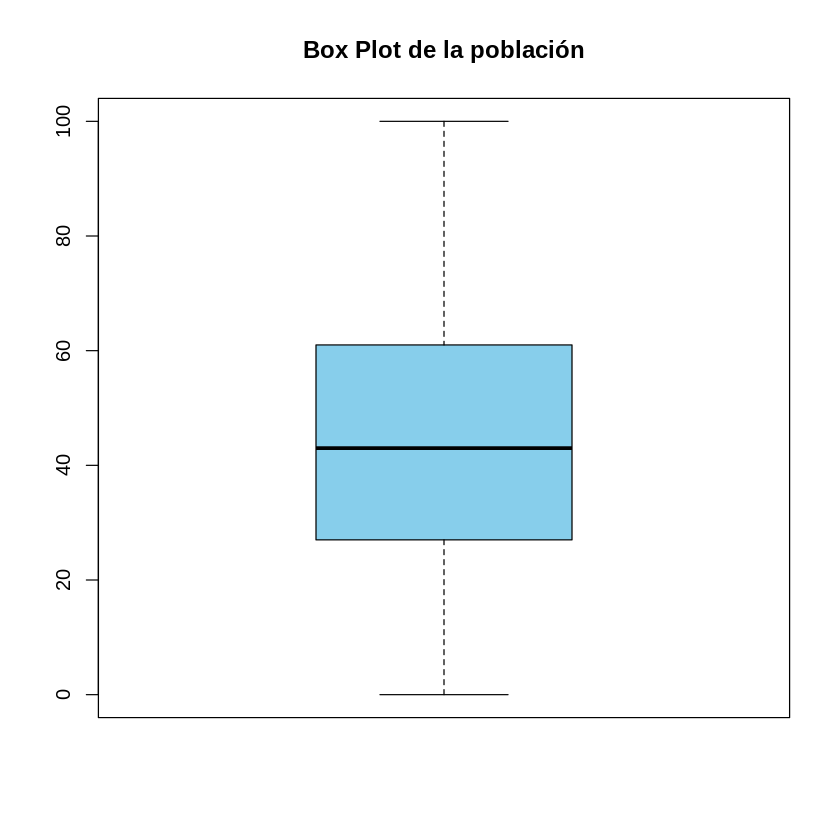

In [16]:
boxplot(edades_final$Edad,
        main = 'Box Plot de la población',
        col = 'skyblue'
      )

Con este gráfico seguimos confirmando un poco lo que hemos comentado previamente. El rango intercuartil no es excesivamente grande, podemos ver que está entre los 30 y los 60, la media está, como la moda, alrededor de los 40. Donde menos concentración de datos tenemos es en el último cuartil.

3.-Calcular la media y la desviación estándar de la distribución de edades de la ciudad.

In [19]:
cat('Media', mean(edades_final$Edad), '\n')
cat('Desviación Estándar', sd(edades_final$Edad))

Media 43.95015 
Desviación Estándar 23.20859

Extra:

Para acabar, he pensado en comparar la distribución de estos datos en distintos barrios de la ciudad. El supuesto inicial es que la distribución de población no será la misma en barrios más humildes que en los barrios de la zona alta de Barcelona. Para hacerlo, usaremos el data set más actualizado que he encontrado donde nos da la renta familiar por barrios de la ciudad. Veámoslo:

Primero cargaremos este documento para encontrar los barrios con el índice RFP (Renta Familiar Disponible) más alto y más bajo de la ciudad.

In [20]:
renta <- read.csv(file='2017_distribucio_territorial_renda_familiar.csv', header=TRUE, sep = ',', dec = '.')
head(renta)

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Població,Índex.RFD.Barcelona...100
,<int>,<int>,<chr>,<int>,<chr>,<int>,<dbl>
1,2017,1,Ciutat Vella,1,el Raval,47986,71.2
2,2017,1,Ciutat Vella,2,el Barri Gòtic,16240,106.1
3,2017,1,Ciutat Vella,3,la Barceloneta,15101,79.6
4,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",22923,99.4
5,2017,2,Eixample,5,el Fort Pienc,32048,106.5
6,2017,2,Eixample,6,la Sagrada Família,51651,101.8


In [21]:
#Observamos los 6 barrios con una renta familiar disponible más baja
head(renta[order(renta$Índex.RFD.Barcelona...100), ])

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Població,Índex.RFD.Barcelona...100
,<int>,<int>,<chr>,<int>,<chr>,<int>,<dbl>
55,2017,8,Nou Barris,55,Ciutat Meridiana,10369,38.6
12,2017,3,Sants-Montjuïc,12,la Marina del Prat Vermell,1151,40.0
56,2017,8,Nou Barris,56,Vallbona,1379,40.9
54,2017,8,Nou Barris,54,Torre Baró,2859,46.5
57,2017,9,Sant Andreu,57,la Trinitat Vella,10006,47.1
53,2017,8,Nou Barris,53,la Trinitat Nova,7271,48.2


In [22]:
#5 Barrios con una renta familiar más alta
head(renta[order(-renta$Índex.RFD.Barcelona...100), ])

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Població,Índex.RFD.Barcelona...100
,<int>,<int>,<chr>,<int>,<chr>,<int>,<dbl>
21,2017,4,Les Corts,21,Pedralbes,12117,248.8
24,2017,5,Sarrià-Sant Gervasi,24,les Tres Torres,16660,215.8
23,2017,5,Sarrià-Sant Gervasi,23,Sarrià,25106,193.6
26,2017,5,Sarrià-Sant Gervasi,26,Sant Gervasi - Galvany,47753,192.1
25,2017,5,Sarrià-Sant Gervasi,25,Sant Gervasi - la Bonanova,25909,184.6
7,2017,2,Eixample,7,la Dreta de l'Eixample,44246,175.9


Con esta información, ahora analizaremos las distribuciones de población de Pedralbes y Ciutat Meridiana y intentaremos detectar las diferencias. Hay que usar un código muy parecido al del inicio para trasponer y desagrupar los datos.

In [23]:
#Pedralbes 21
Pedralbes <- dades[21, -c(1,2,3)] #Seleccionamos la columna que nos interesa
Pedralbes_t <- t(Pedralbes) #Transponemos los datos
df.pedralbes_t <- data.frame(Pedralbes_t)
df.pedralbes_t$Edad <- seq(0,100) #Añadimos una columna con la Edad
head(df.pedralbes_t)

,X21,Edad
,<dbl>,<int>
X0,179,0
X1,214,1
X2,201,2
X3,210,3
X4,203,4
X5,214,5


In [24]:
#Ciutat Meridiana 55
Meridiana <- dades[55, -c(1,2,3)] #Seleccionamos la columna que nos interesa
Meridiana_t <- t(Meridiana) #Transponemos los datos
df.meridiana_t <- data.frame(Meridiana_t)
df.meridiana_t$Edad <- seq(0,100) #Añadimos una columna con la Edad
head(df.meridiana_t)

,X55,Edad
,<dbl>,<int>
X0,33,0
X1,36,1
X2,28,2
X3,37,3
X4,29,4
X5,38,5


In [25]:
#Desagrupamos los datos
pedralbes_final <- df.pedralbes_t %>%
  pivot_longer(cols = -Edad, names_to = "Personas", values_to = "Poblacion") %>%
  ungroup() %>%
  slice(rep(1:n(), times = df.pedralbes_t$X21))
pedralbes_final$Personas <- 1

head(pedralbes_final)

meridiana_final <- df.meridiana_t %>%
  pivot_longer(cols = -Edad, names_to = "Personas", values_to = "Poblacion") %>%
  ungroup() %>%
  slice(rep(1:n(), times = df.meridiana_t$X55))
meridiana_final$Personas <- 1

head(meridiana_final)

Edad,Personas,Poblacion
<int>,<dbl>,<dbl>
0,1,179
0,1,179
0,1,179
0,1,179
0,1,179
0,1,179


Edad,Personas,Poblacion
<int>,<dbl>,<dbl>
0,1,33
0,1,33
0,1,33
0,1,33
0,1,33
0,1,33


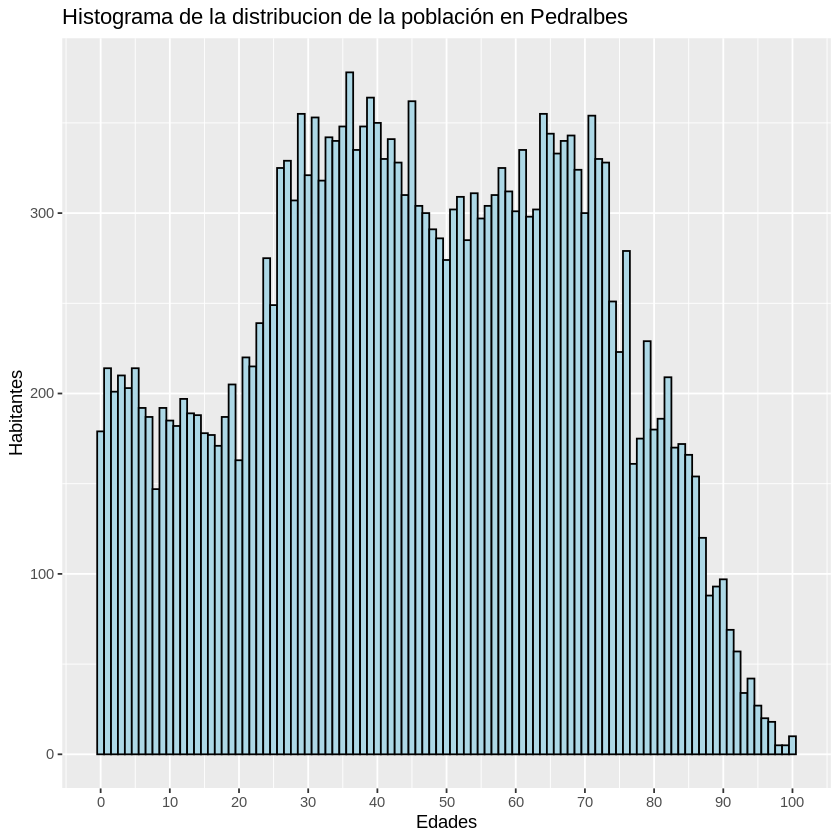

In [26]:
#Graficamos ambos casos

ggplot(pedralbes_final, aes(x = Edad)) +
 geom_histogram(binwidth = 1,
                 fill = 'lightblue',
                 color = 'black') +
 labs(title = 'Histograma de la distribucion de la población en Pedralbes',
       x = 'Edades',
       y = 'Habitantes') +
 scale_x_continuous(breaks = seq(0, 100, 10))

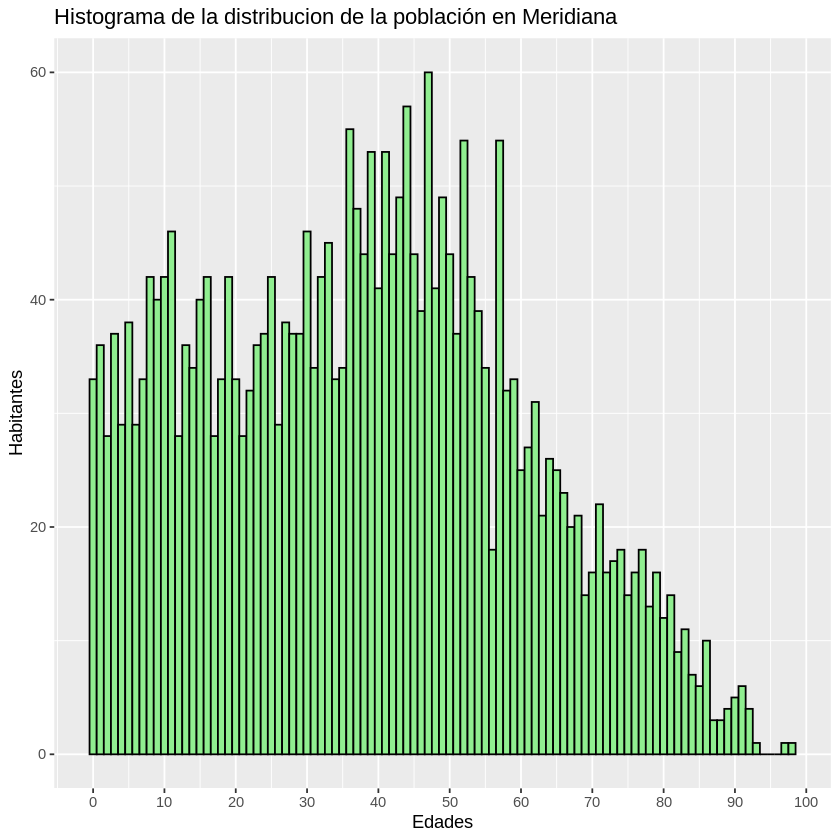

In [27]:
ggplot(meridiana_final, aes(x = Edad)) +
 geom_histogram(binwidth = 1,
                 fill = 'lightgreen',
                 color = 'black') +
 labs(title = 'Histograma de la distribucion de la población en Meridiana',
       x = 'Edades',
       y = 'Habitantes') +
 scale_x_continuous(breaks = seq(0, 100, 10))

¡Y aquí lo tenemos! En ambos gráficos podemos ver un patrón general un poco similar, porque la mayoría de la población está concentrada en esa edad media que hemos comentado anteriormente, pero la realidad es que hay diferencias importantes a mencionar:

*   Pedralbes es un barrio mucho más poblado.

*   Pedralbes tiene mucha más población de tercera edad, casi tanta como adultos de 40 años, por contra, Ciudad Meridiana tiene menos población de tercera edad que menores de edad.

*   Ciudad Meridiana tiene más jóvenes adultos y niños en comparación con Pedralbes.

*   Aun así, la moda en Pedralbes parece estar al rededor de los 40, un poco por debajo, en cambio, en Ciudad Meridana está cerca de los 50.







**Problema 2**

1.- Obtened una visión global de todas las variables y comentadlas.

Para empezar cargaremos el documento y visualizaremos como es la estructura de este

In [31]:
halcon <- read.csv(file='Halcon.csv', header=TRUE, sep=',', dec='.')
head(halcon)

,X,Month,Day,Year,CaptureTime,ReleaseTime,BandNumber,Species,Age,Sex,Wing,Weight,Culmen,Hallux,Tail
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<int>
1,1,9,19,1992,13:30,,877-76317,RT,I,,385,920,25.7,30.1,219
2,3,9,23,1992,12:45,,877-76319,RT,I,,381,990,26.7,31.3,235
3,4,9,23,1992,10:50,,745-49508,CH,I,F,265,470,18.7,23.5,220
4,5,9,27,1992,11:15,,1253-98801,SS,I,F,205,170,12.5,14.3,157
5,6,9,28,1992,11:25,,1207-55910,RT,I,,412,1090,28.5,32.2,230
6,7,9,28,1992,13:30,,877-76320,RT,I,,370,960,25.3,30.1,212


En estas dos visualizaciones, observamos que tenemos una tabla de 17 columnas y 891 filas. Cada observación nos da características e información de un halcón distinto. También podemos observar, debajo de su nombre, qué tipo de variable tenemos en cada columna. Mayoritariamente, son 'integers' pero también tenemos alguna del tipo 'character', numéricas o números de punto flotante de doble precisión, 'dbl.

In [32]:
str(halcon) #Observamos los tipos de variables que tenemos

'data.frame':	891 obs. of  15 variables:
 $ X          : int  1 3 4 5 6 7 8 9 10 11 ...
 $ Month      : int  9 9 9 9 9 9 9 9 9 10 ...
 $ Day        : int  19 23 23 27 28 28 29 29 30 5 ...
 $ Year       : int  1992 1992 1992 1992 1992 1992 1992 1992 1992 1992 ...
 $ CaptureTime: chr  "13:30" "12:45" "10:50" "11:15" ...
 $ ReleaseTime: chr  "" " " " " " " ...
 $ BandNumber : chr  "877-76317" "877-76319" "745-49508" "1253-98801" ...
 $ Species    : chr  "RT" "RT" "CH" "SS" ...
 $ Age        : chr  "I" "I" "I" "I" ...
 $ Sex        : chr  "" "" "F" "F" ...
 $ Wing       : num  385 381 265 205 412 370 375 412 405 393 ...
 $ Weight     : int  920 990 470 170 1090 960 855 1210 1120 1010 ...
 $ Culmen     : num  25.7 26.7 18.7 12.5 28.5 25.3 27.2 29.3 26 26.3 ...
 $ Hallux     : num  30.1 31.3 23.5 14.3 32.2 30.1 30 31.3 30.2 30.8 ...
 $ Tail       : int  219 235 220 157 230 212 243 210 238 222 ...


Con el comando str(), podemos ver con un poco más de detalle como son cada una de las variables. Aquí también podemos ver el tipo de variables pero, a su vez, que forma tienen las distintas observaciones. Con esto y la información que nos da el problema podemos entender mejores los datos. Por ejemplo vemos que las edades no nos dan un valor numérico, sino que solamente clasifican a los halcones según adulto o inmaduro.

Así mismo, se puede observar que tenemos diversas variables con observaciones sin información. A continuación las investigaremos para entender cuantos valores nulos tienen cada una de ellas.

In [33]:
variables <- c('ReleaseTime', 'Sex')
empty <- sapply(halcon[variables], function(col) sum(col == "" | col ==" "))
print(empty)

ReleaseTime         Sex 
        827         566 


Estábamos en lo cierto, ambas variables tienen muchos valores nulos y esto tendrá que tenerse en cuenta si las queremos analizar.

2.-Realizad un estudio de estadística descriptiva de las variables Wing y Tail (Cread tablas de contingencia para cada una de las variables)

Antes de empezar a analizarlas, y para evitar futuros problemas, comprobamos si nuestras variables tienen valores nulos que puedan afectar a nuestros estadísticos

In [34]:
variables <- c('Wing', 'Tail')
empty <- sapply(halcon[variables], function(col) sum(col == "" | col ==" "))
print(empty)

Wing Tail 
   0    0 


Una vez sabemos que no tienen, podemos empezar a analizarlas.

Calculamos los principales estadísticos para entender mejor como están distribuidas variables Wing y Tail



**Estadísticos básicos:**

Variable Wing:

In [35]:
mean(halcon$Wing) #Media de la variable 'Wing'
median(halcon$Wing) #Mediana de la variable 'Wing'
range(halcon$Wing) #Rango de la variable 'Wing'
sd(halcon$Wing) #Desviación Estàndard de la variable 'Wing'
var(halcon$Wing) #Varianza de la variable 'Wing'
sd(halcon$Wing)/mean(halcon$Wing) #Coeficiente de variación de 'Wing'

[1] 315.9475

[1] 370

[1]  37.2 480.0

[1] 95.3167

[1] 9085.273

[1] 0.3016853

Calculando los primeros estadísticos nos damos cuenta que mediana es bastante más alta que la media, así que tendremos la mitad de los datos con unos valores bastante superiores a la media. De esto también se puede leer que tendremos datos muy inferiores a la media para compensar este desajuste, un ejemplo de esto es el mínimo, que está mucho más alejado de la media que el máximo.

Podemos ver que hay un rango amplio y que la desviación estandard nos dice que los datos se desvían 95 unidades con respecto a la media. La dispersión de esta y la siguiente variable a analizar pueden surgir de que estamos analizando datos de especies de halcones con características distintas, más adelante lo analizaremos.

Variable Tail:

In [36]:
mean(halcon$Tail) #Media de la variable 'Tail'
median(halcon$Tail) #Mediana de la variable 'Tail'
range(halcon$Tail) #Rango de la variable 'Tail'
sd(halcon$Tail) #Desviación Estàndard de la variable 'Tail'
var(halcon$Tail) #Varianza de la variable 'Tail'
sd(halcon$Tail)/mean(halcon$Tail) #Coeficiente de variación de 'Tail'

[1] 198.8934

[1] 214

[1] 119 288

[1] 36.82663

[1] 1356.201

[1] 0.1851577

Aquí pasa algo parecido, pero con unos valores más pequeños, la media está por encima de la media, el rango es grande y sobre la variabilidad de los datos sabemos que la desviación estándard es aproximadamente 37, es decir que los datos de media se desvían 37 unidades de la media.

**Cuartiles**

Variable Wing

In [37]:
quantile(halcon$Wing,0.25)
quantile(halcon$Wing,0.5)
quantile(halcon$Wing,0.75)
IQR(halcon$Wing,na.rm = FALSE)

25% 
202

50% 
370

75% 
390

[1] 188

De este análisis de los cuartiles podemos sacar conclusiones interesantes y empezar a entender como están distribuidos los datos. Para empezar, vemos que el primer cuartil es el más grande de todos, por lo tanto, vemos que entre los valores bajos hay muy poca densidad de datos. Por otro lado, también vemos que el tercer cuartil es de un rango muy pequeño, así que se entiende que los datos en esa zona están altamente concentrados.

El rango intercuartil también nos ayuda a dimensionar lo que hemos comentado del primero, un 50% de los datos están concentrados entre el cuartil 2 y 3 con un rango de 188, que es un rango parecido al que hay entre el mínimo 37.2 (aparecía antes en la función rango) y el valor del primer cuartil, 202.

Variable Tail

In [38]:
quantile(halcon$Tail,0.25)
quantile(halcon$Tail,0.5)
quantile(halcon$Tail,0.75)
IQR(halcon$Tail,na.rm = FALSE)

25% 
160

50% 
214

75% 
225

[1] 65

En esta variable sucede algo similar, el tercer cuartil es el del rango menor con mucha diferencia, sin embargo, el mayor cuartil es el segundo que tiene un rango de 54 unidades. Nótese que el rango intercuartil es de 65 y que el tercer cuartil solo lo forman 11 unidades.

**Moda**

Variable Wing:

In [39]:
sort(table(halcon$Wing), decreasing = TRUE) #Medidas de 'Wing' más repetidas


 390  375  385  370  400  380  381  410  161  372  378  382  392  395  165  193 
  22   21   18   17   17   16   14   14   13   12   12   12   12   12   11   11 
 194  199  369  371  376  412  363  365  373  377  379  384  391  195  230  393 
  11   11   11   11   11   11   10   10   10   10   10   10   10    9    9    9 
 398  168  170  196  202  368  386  396  403  160  163  190  191  200  203  360 
   9    8    8    8    8    8    8    8    8    7    7    7    7    7    7    7 
 362  367  374  388  394  405  415  162  166  197  198  201  204  205  364  397 
   7    7    7    7    7    7    7    6    6    6    6    6    6    6    6    6 
 399  404  416  159  169  171  209  225  260  387  389  401  402  406  408  420 
   6    6    6    5    5    5    5    5    5    5    5    5    5    5    5    5 
 156  164  172  192  213  233  350  354  361  366  383  409  167  175  177  223 
   4    4    4    4    4    4    4    4    4    4    4    4    3    3    3    3 
 252  255  265  268  407  4

Con este comando estamos ordenando los datos en orden decreciente para entender cuáles son los que aparecen más en nuestro dataset. Podemos ver que el que más lo hace es 390 que será la moda de la variable. En este caso, se observa mayor que la media y la mediana.

Variable Tail

In [40]:
sort(table(halcon$Tail), decreasing = TRUE) #Medidas de 'Tail' más repetidas


220 215 225 230 210 221 216 217 223 235 218 222 227 238 214 219 226 158 212 213 
 31  27  26  24  22  21  20  20  20  20  19  19  17  16  15  15  15  14  14  13 
131 132 156 233 155 160 207 211 135 136 224 137 150 209 229 231 232 133 153 154 
 12  12  12  12  11  11  11  11  10  10  10   9   9   9   9   9   9   8   8   8 
157 159 200 208 228 234 130 204 205 206 236 237 242 129 196 201 125 134 152 162 
  8   8   8   8   8   8   7   7   7   7   7   7   7   6   6   6   5   5   5   5 
163 165 185 192 245 122 127 138 151 161 164 186 199 239 240 241 243 250 124 140 
  5   5   5   5   5   4   4   4   4   4   4   4   4   4   4   4   4   4   3   3 
145 147 149 195 197 202 203 244 247 248 123 126 139 141 143 144 146 169 183 184 
  3   3   3   3   3   3   3   3   3   3   2   2   2   2   2   2   2   2   2   2 
187 190 193 198 246 260 267 119 121 128 142 148 168 170 178 179 180 181 182 188 
  2   2   2   2   2   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1 
191 249 251 253 255 257 276

Para la variable 'Tail' el dato que más veces aparece, y por lo tanto, la moda es el 220, que también es mayor que la media y la mediana.

**Summary**

También podríamos obtener muchas de estas características de las dos variables segregadas por tipo de especie

In [41]:
by(halcon$Wing, halcon$Species, summary)

halcon$Species: CH
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  145.0   227.0   240.0   244.1   260.0   377.0 
------------------------------------------------------------ 
halcon$Species: RT
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   37.2   372.0   384.0   383.6   399.0   480.0 
------------------------------------------------------------ 
halcon$Species: SS
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  143.0   165.5   191.0   184.9   199.0   370.0 

In [42]:
by(halcon$Tail, halcon$Species, summary)

halcon$Species: CH
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    157     186     200     201     215     233 
------------------------------------------------------------ 
halcon$Species: RT
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  122.0   214.0   221.0   222.1   230.0   288.0 
------------------------------------------------------------ 
halcon$Species: SS
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  119.0   133.0   150.0   146.7   157.5   221.0 

Visualizar los estadísticos por especies nos da mucha más información. Podemos entender que, de media, los halcones de la especie RT son los que tienen el ala principal más grande, y los de la especie SS los que, de media, lo tienen más pequeño. Con los datos de la cola podemos observar lo mismo.

Pero es aún mejor fijarnos que al separar por especies vemos que los datos están mucho más concentrados, el rango intercuartil se reduce muchísimo con respecto al que habíamos visto anteriormente. Tiene sentido, antes comparábamos especies que podían tener características muy distintas y ahora comparamos halcones de la misma especie, los cuales podemos ver tener características muy similares. Lo veremos también al final de este ejercicio.

**Graficamos los datos:**

Para ello, dibujaremos un histograma siguiendo la Ley de Strurges que vimos en clase. Nos ayudara a definir la cantidad de bins que queremos que tenga el histograma.

*   "El número de bins debe ser el valor redondeado de la raíz cuadrada del número de observaciones"



In [43]:
print(length(halcon$Wing)) #Número de Observaciones
sqrt = sqrt(length(halcon$Wing)) #Raíz cuadrada

num_bins1 = round(sqrt)
print(num_bins1)

[1] 891
[1] 30


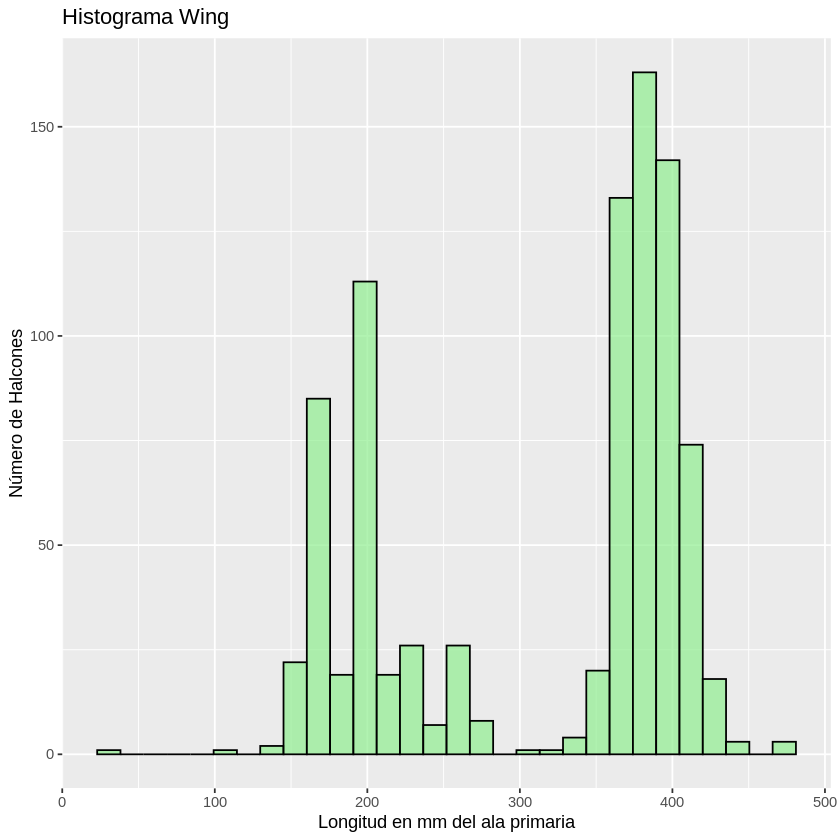

In [44]:
ggplot(halcon, aes(x = Wing)) +
  geom_histogram(bins = 30, fill = 'lightgreen', color = 'black', alpha = 0.7) +
  labs(title = "Histograma Wing",
       x = "Longitud en mm del ala primaria",
       y = "Número de Halcones")

¿Y la variable Tail?

In [45]:
print(length(halcon$Tail)) #Número de Observaciones
sqrt = sqrt(length(halcon$Tail)) #Raíz cuadrada

num_bins2 = round(sqrt)
print(num_bins2)

[1] 891
[1] 30


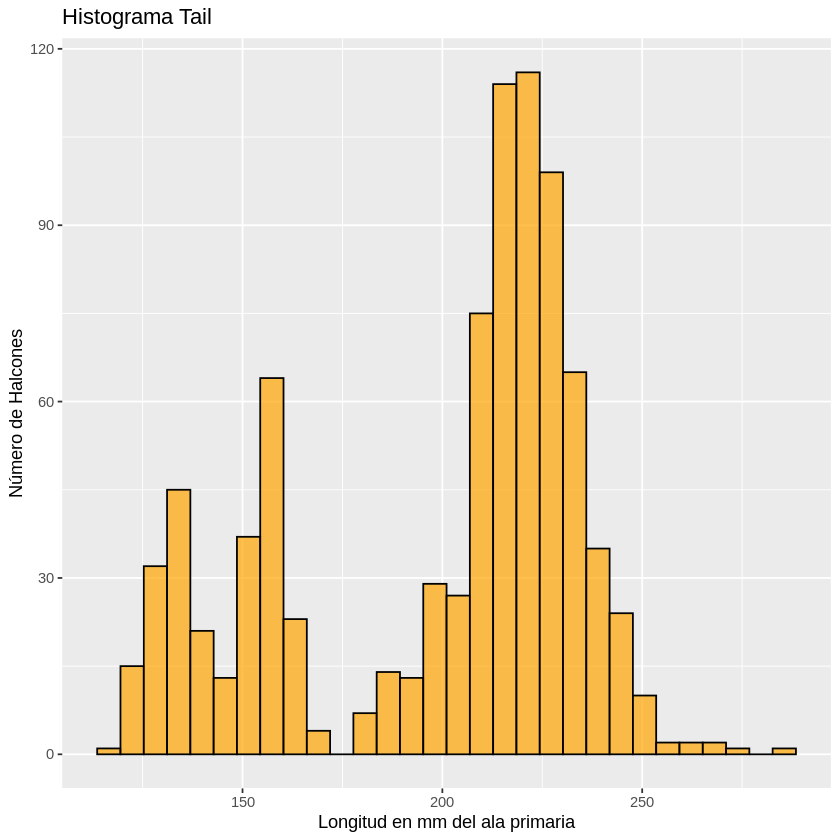

In [46]:
ggplot(halcon, aes(x = Tail)) +
  geom_histogram(bins = 30, fill = 'orange', color = 'black', alpha = 0.7) +
  labs(title = "Histograma Tail",
       x = "Longitud en mm del ala primaria",
       y = "Número de Halcones")

En ambos gráficos podemos ver que hay un mismo patrón. Parecen haber, mínimo, dos grupos bastante diferenciados. Existen dos concentraciónes de datos en la variable Wing entre 150 - 270 mm y 350 - 450 mm y dos más en la Tail entre 50 - 175mm y 200 - 250. Esta información nos puede indicar que tenemos un mínimo de dos tipos de halcones con características muy diferenciadas.

Por último, tambien se observan algunos datos muy dispersos. El mejor ejemplo está en la variable Wing, donde observamos tener datos cercanos a 0 que esta muy alejado de todo lo demás.

También podemos investigar con la grafica de densidad, que debería ser (y en efecto es) muy similar al histograma previo.

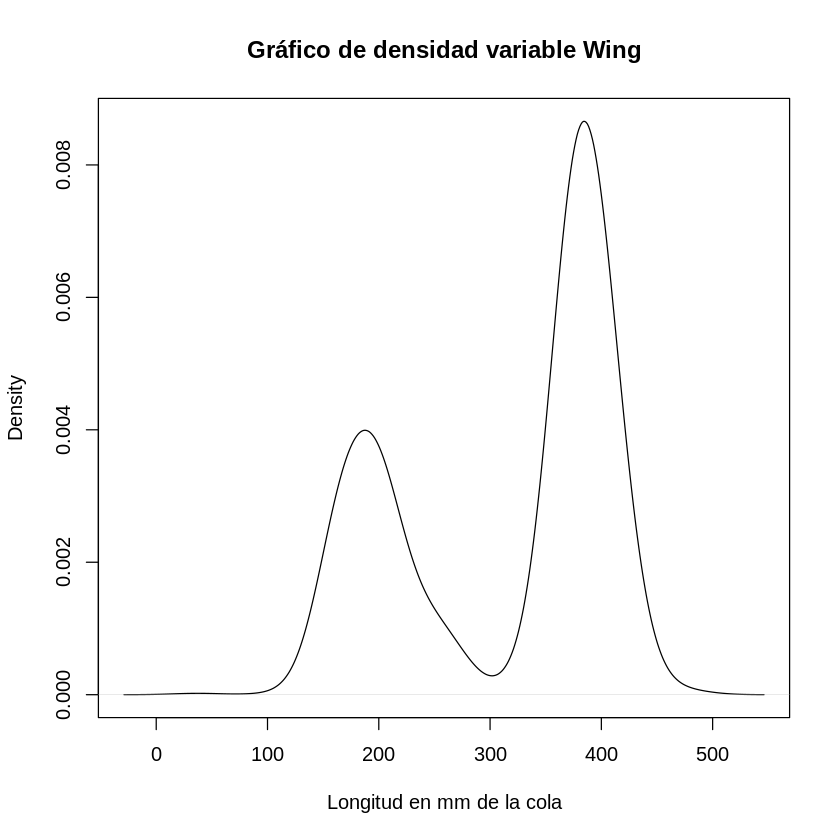

In [47]:
plot(density(halcon$Wing),
     main = 'Gráfico de densidad variable Wing',
     xlab = 'Longitud en mm de la cola')

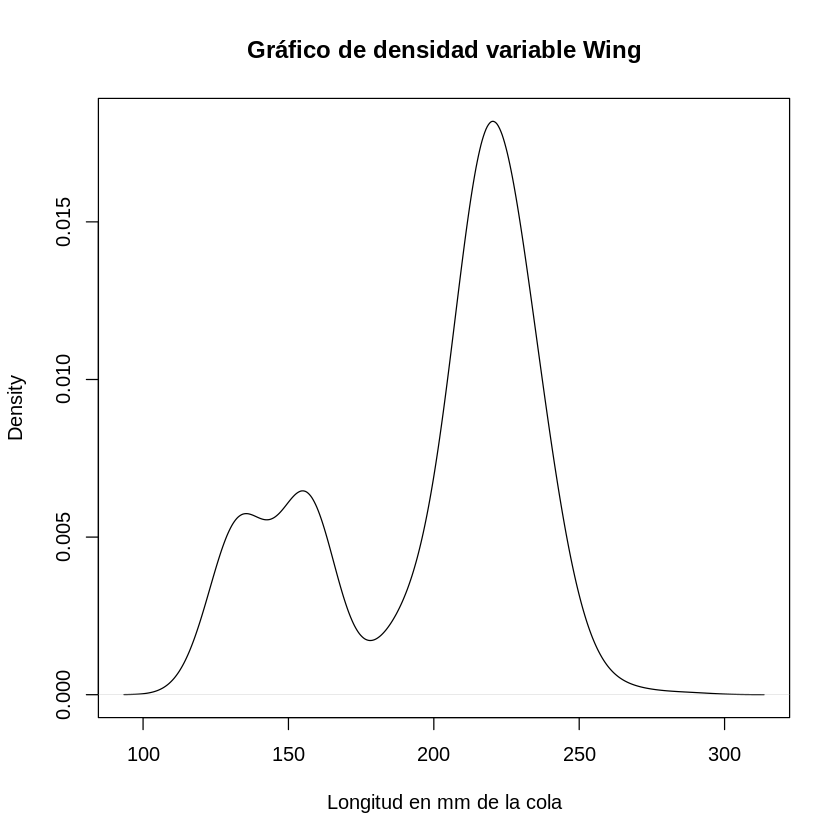

In [48]:
plot(density(halcon$Tail),
     main = 'Gráfico de densidad variable Wing',
     xlab = 'Longitud en mm de la cola')

**Tablas de Contingencia**

Para hacer la tabla de contingencia necesitamos variables cualitativas. Teniendo en cuenta que ya tenemos la de las especies, vamos a tener que crear una nueva. Una opción que podría ser interesante, sería crear cuatro variables nuevas que vayan en función de la ubicación de los datos en los cuartiles. Para ello primero necesitamos ver el gráfico más relacionado con estos, el boxplot.

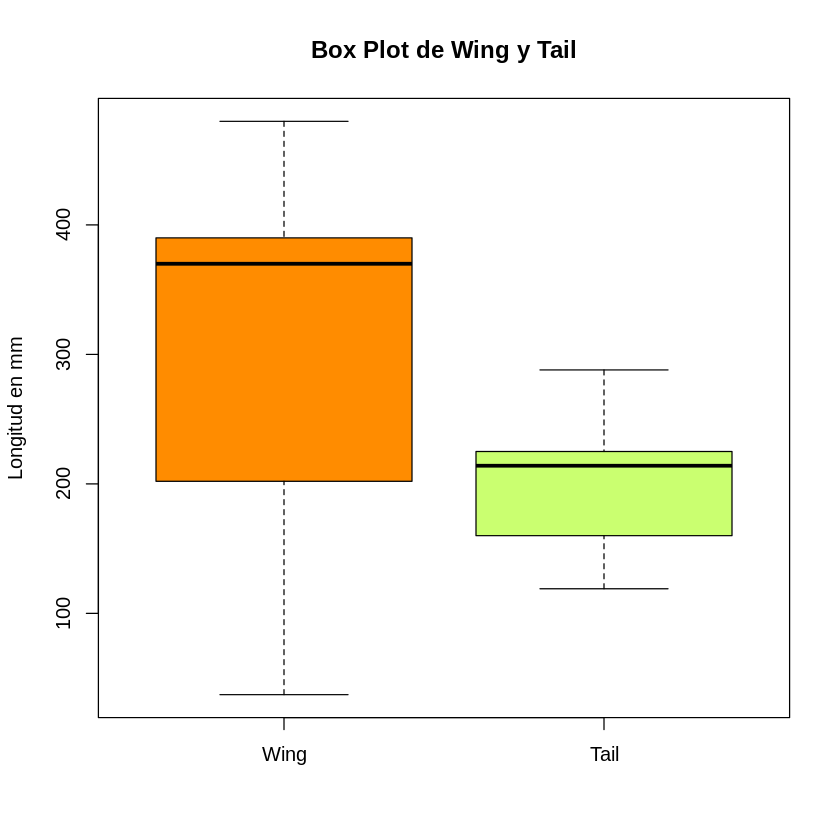

In [49]:
boxplot(halcon$Wing, halcon$Tail,
        main = 'Box Plot de Wing y Tail',
        ylab = 'Longitud en mm',
        col = c('darkorange','darkolivegreen1'),
        names = c('Wing', 'Tail'))

Teniendo en cuenta que son distribuciones similares en forma, pero muy distintas en rango, podemos esta forma de segregar los datos y ver si realmente hay diferencias.

In [50]:
halcon$WingQ <-
  ifelse(halcon$Wing < quantile(halcon$Wing, 0.25),"Cuartil_Wing1",
  ifelse(halcon$Wing < quantile(halcon$Wing, 0.50), "Cuartil_Wing2",
  ifelse(halcon$Wing < quantile(halcon$Wing,0.75), "Cuartil_Wing3",
  "Cuartil_Wing4")))

#Añadimos la variable Cuartiles que lo que hace es clasificar todos los datos de la variable Tail en su cuartil correspondiente

table(halcon$Species,halcon$WingQ) #Creamos la tabla

    
     Cuartil_Wing1 Cuartil_Wing2 Cuartil_Wing3 Cuartil_Wing4
  CH             4            64             1             0
  RT             3           106           218           240
  SS           209            45             1             0

In [51]:
halcon$TailQ <-
  ifelse(halcon$Tail < quantile(halcon$Tail, 0.25) ,"Cuartil_Tail1",
  ifelse(halcon$Tail < quantile(halcon$Tail, 0.50), "Cuartil_Tail2",
  ifelse(halcon$Tail < quantile(halcon$Tail,0.75), "Cuartil_Tail3",
  "Cuartil_Tail4")))

#Añadimos la variable Cuartiles que lo que hace es clasificar todos los datos de la variable Tail en su cuartil correspondiente


table(halcon$Species,halcon$TailQ) #Creamos la talba

    
     Cuartil_Tail1 Cuartil_Tail2 Cuartil_Tail3 Cuartil_Tail4
  CH             2            46            14             7
  RT             3           130           200           234
  SS           212            40             3             0

Aquí podemos ver algunas de las cosas que hemos ido hablando anteriormente. Claramente, se ve que en general la especie SS es la que tiene tanto la cola como el ala principal más pequeñas, la mayoría de sus datos están en el primer cuartil de la distribución general. La especie CH tiene muchos de sus datos en el segundo y, por último, la especie grande (RT) es de la que más datos tenemos, la que los tiene más repartidos y la que en general tiene las medidas más grandes.


3.- Analizad mediante un Scatterplot cómo se relacionan ambas variables.

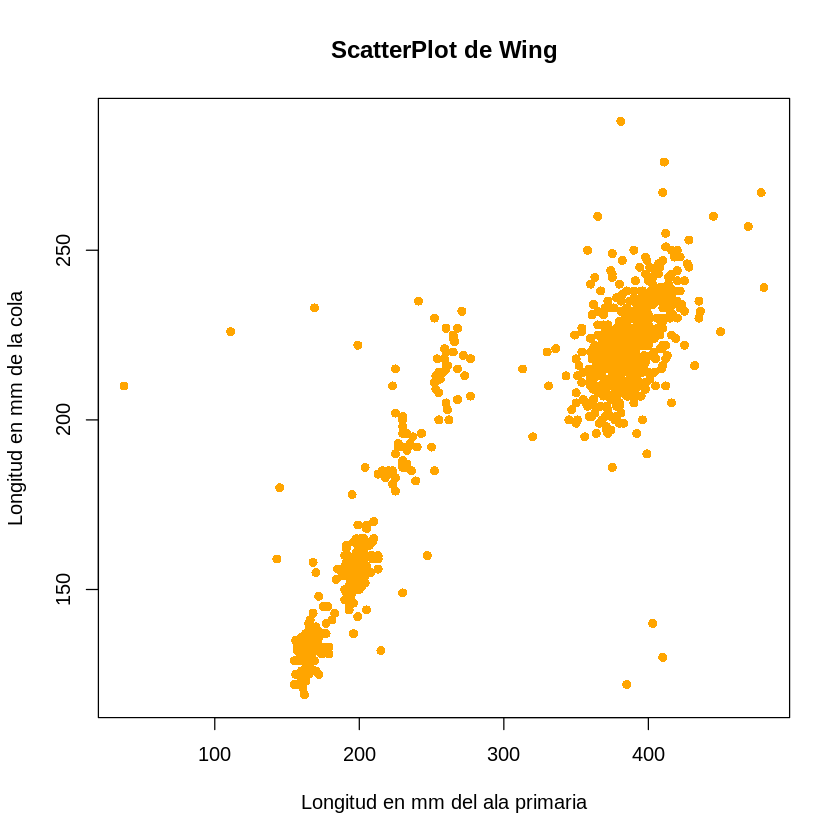

In [52]:
plot(halcon$Wing,
     halcon$Tail,
     main = 'ScatterPlot de Wing',
     xlab = 'Longitud en mm del ala primaria',
     ylab = 'Longitud en mm de la cola',
     pch = 16,
     col = 'orange',
     bg = 'orange')

En el gráfico, podemos ver que hay una relación positiva entre las variables Wing y Tail. Si nos fijamos bien, es algo que se ha ido repitiendo en diversos análisis que hemos hecho de estas variables. Al tener los datos distribuidos una forma similar, podemos ver que, generalmente, los halcones con un ala primaria más grande, suelen tener una cola más

En el gráfico también podemos ver lo que parecen dos grupos (tal vez alguno más) bastante diferenciados de datos. Hay una zona muy poblada en la parte alta a la derecha del scatter, y luego unas cuantas agrupaciones de datos en el centro. La relación lineal positiva parece ser mayor en este grupo en comparación con la del grupo superior.

Teniendo en cuenta que podemos clasificar entre especies de aves, puede que esto nos ayude a distinguir entre los grupos. Veámoslo, pero antes, deberemos instalar la librería ggplot2 que nos dará un poco más de flexibilidad a la hora de graficar.

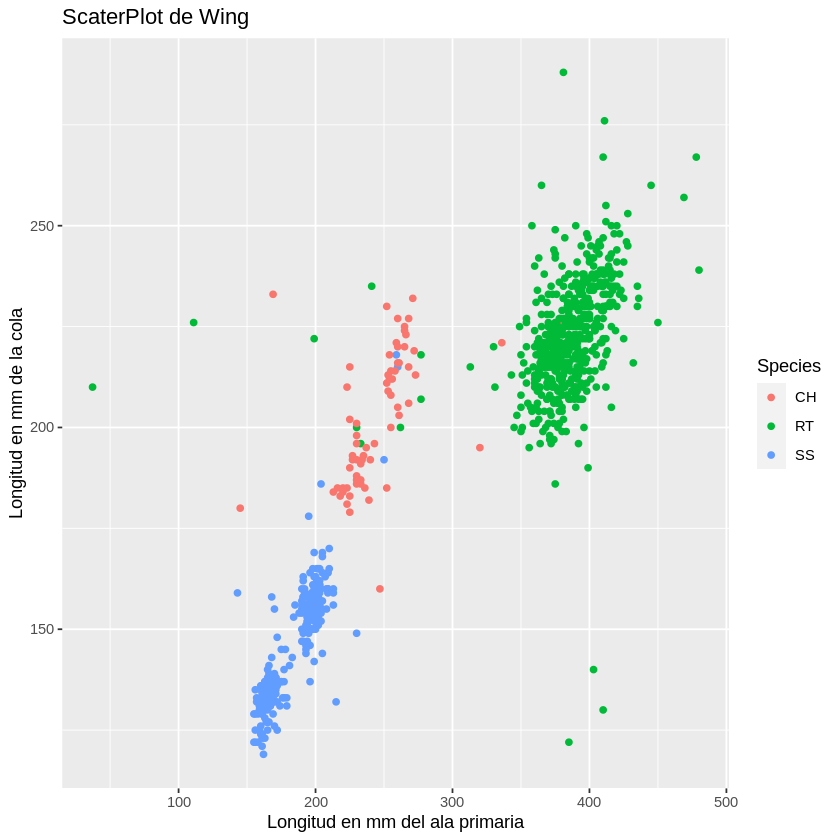

In [53]:
library('ggplot2')
ggplot(halcon) +
  aes(x = Wing, y = Tail, colour = Species) +
  geom_point()+
  labs(
      title='ScaterPlot de Wing'
      ,x = 'Longitud en mm del ala primaria'
      ,y = 'Longitud en mm de la cola') +
  scale_color_hue()

¡Estábamos en lo cierto! Podemos observar tres grupos bien diferenciados de datos qué por lo que vemos aquí, parecen ser los grupos de especies de halcones que estamos analizando.

Por último, es importante mencionar que tenemos diversos outliers. Sobre todo en los datos de la especie RT, tenemos halcones con una longitud de cola muy pequeña y una longitud de ala primaria cercana a la media de la distribución. Pero también tenemos casos en que pasa justo lo contrario.